<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/ejemplo/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD NACIONAL DE COLOMBIA**

**PARCIAL 2**

INTEGRANTES:

LUIS FERNANDO CASTRO BUCHELLY

WILLIAM CAMILO OBANDO CARDENAS

#Punto 1


---



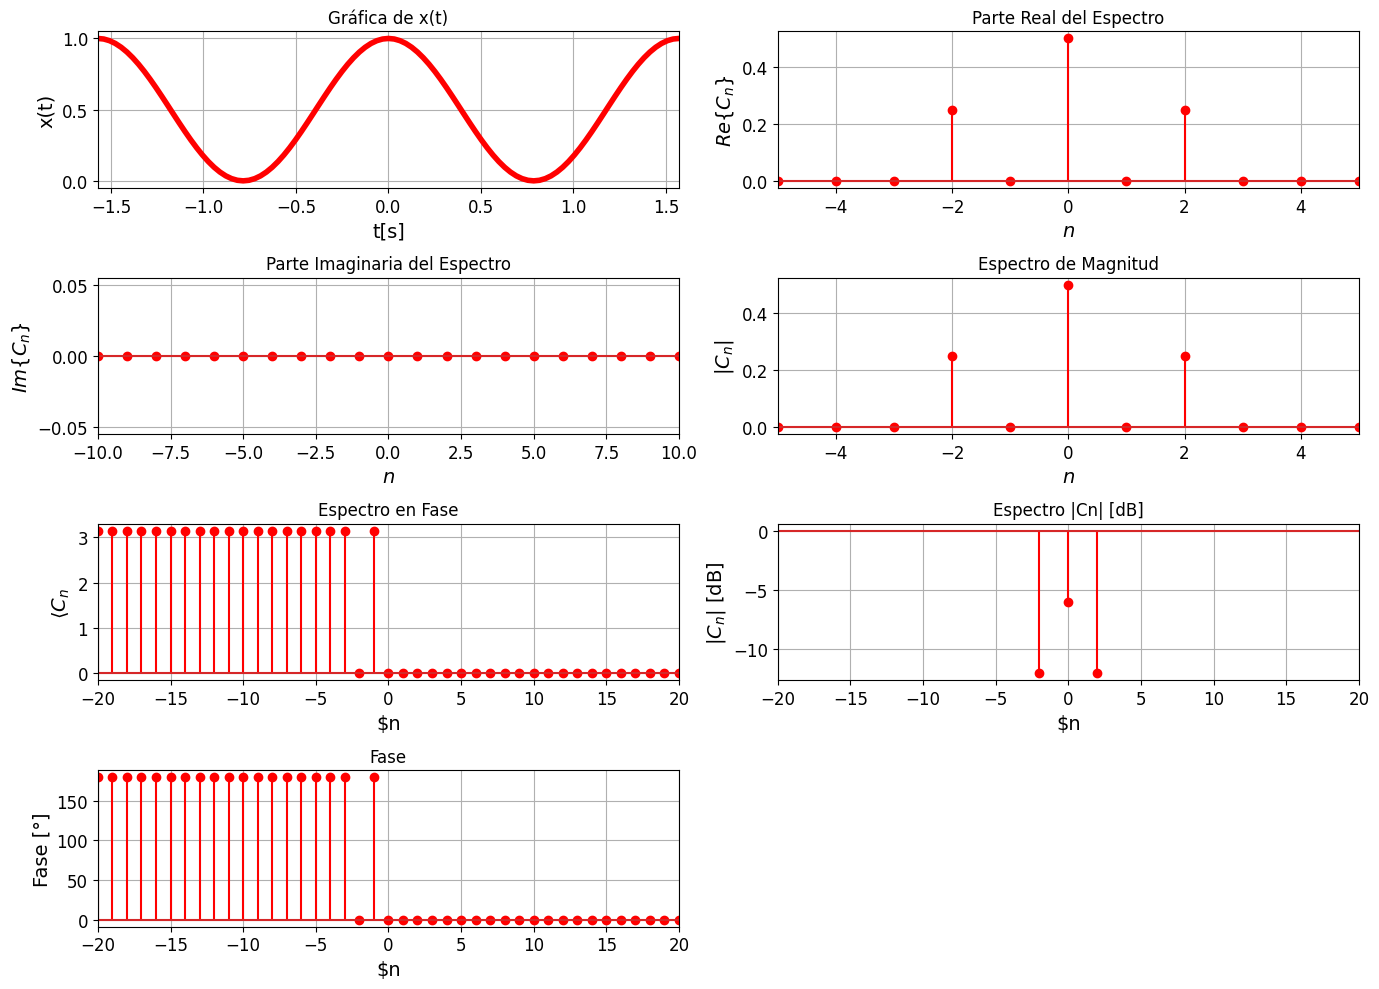

In [ ]:
# Punto 1

# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

To = np.pi # periodo definido
Fo = 1/To
A = 1 # amplitud de la señal
F0 = 1/To  # Frecuencia fundamental (puedes ajustarla)
Fs = Fo*100 # frecuencia de muestreo definida

# Intervalo de tiempo basado en F0
tv = np.arange(-To/2, To/2, 1/Fs)
Nm = len(tv) #numero de muestras requeridas
# Calcular la señal x(t)
xo = (A**2)/2 + (A**2 * np.cos(4 * np.pi * F0 * tv))/2

# Graficar señal original
plt.figure(figsize=(14, 10))  # Ajustar tamaño de la figura
plt.subplot(4, 2, 1)  # Dividir la figura en 3 filas, 2 columnas, y seleccionar la primera
plt.plot(tv, xo, 'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Gráfica de x(t)")
plt.xlim([-1/(2*F0), 1/(2*F0)])  # Limitar el eje x al intervalo deseado


# Calcular y graficar el espectro de Fourier
N = 50  # Número de armónicos a considerar
wo = 2*np.pi/To # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
# Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv) # Cambiar según la señal
Cn = 0*nv  # Inicializar Cn con ceros
Cn[N] = (A**2)/2  # Componente DC (a0)
Cn[N + 2] = (A**2)/4  # Componente correspondiente a cos(4*pi*F0*t) (an/2)
Cn[N - 2] = (A**2)/4  # Componente correspondiente a cos(-4*pi*F0*t) (an/2)

plt.subplot(4, 2, 2)  # Seleccionar la segunda sub-figura
plt.stem(nv, np.real(Cn), 'r')# Parte real del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Parte Real del Espectro")
plt.xlim(-5, 5)

plt.subplot(4, 2, 3)  # Seleccionar la tercera sub-figura
plt.stem(nv, np.imag(Cn), 'r')# Parte imaginaria del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Parte Imaginaria del Espectro")
plt.xlim(-10, 10)

plt.subplot(4, 2, 4)  # Seleccionar la cuarta sub-figura
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Espectro de Magnitud")
plt.xlim(-5, 5)

plt.subplot(4,2,5)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Espectro en Fase")
plt.xlim(-20, 20)

# Espectro de Magnitud en dB
plt.subplot(4, 2, 6)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$n', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.grid()
plt.axis('tight')
plt.title("Espectro |Cn| [dB]")
plt.xlim(-20, 20)

plt.subplot(4, 2, 7)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$n', fontsize=14)
plt.ylabel(r'Fase [°]', fontsize=14)
plt.grid()
plt.axis('tight')
plt.title("Fase")
plt.xlim(-20, 20)




plt.tight_layout()
plt.show()



In [ ]:
from ipywidgets import interact,IntSlider
Px = 3/8 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=3, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

#PUNTO 2:


In [ ]:
# Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess
import os

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-k8mkg9bf/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.1.26
    Uninstalling yt-dlp-2025.1.26:
      Successfully uninstalled yt-dlp-2025.1.26


In [ ]:
# Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [ ]:
# Elimina los archivos antiguos si existen
if os.path.exists('Cancion.mp3'):
    os.remove('Cancion.mp3')
if os.path.exists('Cancion.wav'):
    os.remove('Cancion.wav')
#  Ingreso de la cancion y toma de la muestra
CAC = input("Ingrese el link de su cancion : ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([20])    # El punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
Fc = 2400/np.pi
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

M = XC[0,:,0]

Ingrese el link de su cancion : https://www.youtube.com/watch?v=ZQcEkfisQ6Q
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZQcEkfisQ6Q
[youtube] ZQcEkfisQ6Q: Downloading webpage
[youtube] ZQcEkfisQ6Q: Downloading tv client config
[youtube] ZQcEkfisQ6Q: Downloading player f3d47b5a
[youtube] ZQcEkfisQ6Q: Downloading tv player API JSON
[youtube] ZQcEkfisQ6Q: Downloading ios player API JSON
[youtube] ZQcEkfisQ6Q: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZQcEkfisQ6Q
[youtube] ZQcEkfisQ6Q: Downloading webpage
[youtube] ZQcEkfisQ6Q: Downloading tv client config
[youtube] ZQcEkfisQ6Q: Downloading player f3d47b5a
[youtube] ZQcEkfisQ6Q: Downloading tv player API JSON
[youtube] ZQcEkfisQ6Q: Downloading ios player API JSON
[youtube] ZQcEkfisQ6Q: Downloading m3u8 information
[info] ZQcEkfisQ6Q: Downloading 1 format(s): 251
[download] Destination: Cancion.mp3
[download] 100% of    3.65MiB in 00:00:00 at 15.52MiB/s  


In [ ]:
#  Definicion señal portadora
Ac = float(max(abs(M)))    #considerando Im=1
C = Ac*np.cos(2*np.pi*Fc*t) #señal portadora

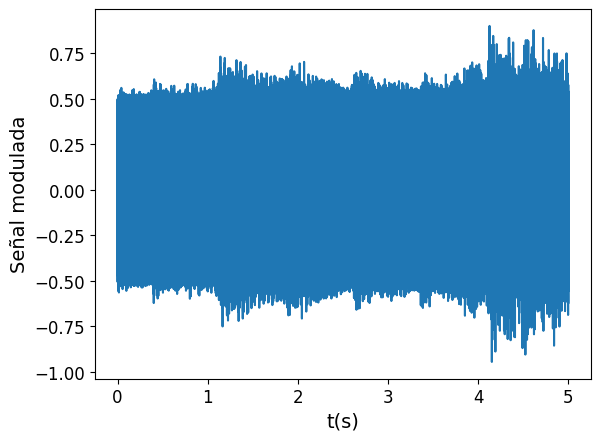

In [ ]:
#  Modulacion de la señal
Y = (1+M/Ac)*C

plt.plot(t,Y)
plt.xlabel('t(s)')
plt.ylabel('Señal modulada')
plt.show()


In [ ]:
#  Transformadas de Fourier de las señales

VF = np.fft.rfftfreq(len(C),1/fs)    #vector de frecuencias
TE = np.fft.rfft(M)    #transformada de la entrada
TP = np.fft.rfft(C)    #transformada portadora
TM = np.fft.rfft(Y)   #transformada modulacion

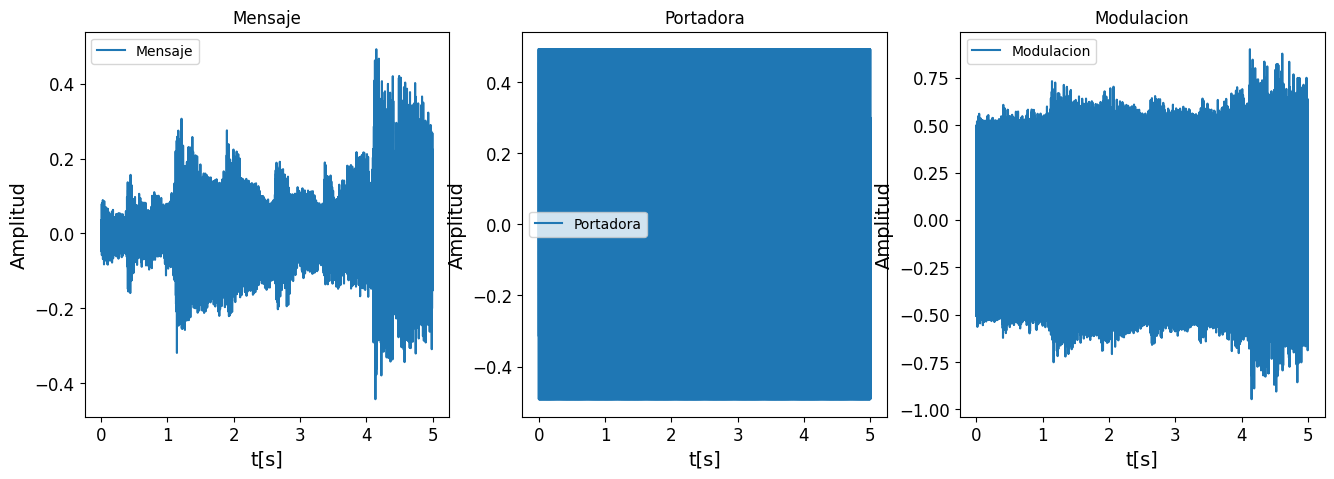

In [ ]:
#  Gráficas en el tiempo

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Mensaje')
plt.plot(t,M,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(132)
plt.title('Portadora')
plt.plot(t,C,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(133)
plt.title('Modulacion')
plt.plot(t,Y,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

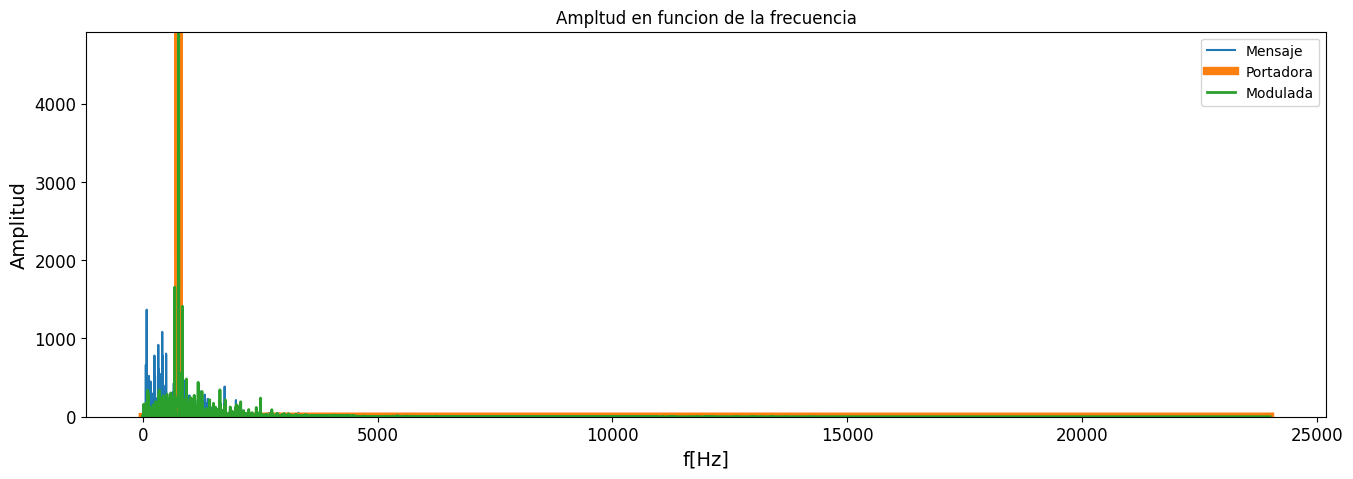

In [ ]:
# Gráficas en la frecuencia

plt.figure(figsize=(16,5))
plt.ylim([min(abs(M)), 10000*max(abs(M))])
plt.plot(VF,TE,label='Mensaje')
plt.plot(VF,TP,label='Portadora',linewidth=6)
plt.plot(VF,TM,label='Modulada',linewidth=2)
plt.title('Ampltud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
Audio(M.T,rate=fs)

In [ ]:
Audio(C,rate=fs)

In [ ]:
Audio(Y,rate=fs)

#PUNTO 3:


**Distorsión Total de Armónicos (THD)**:

El THD es una medida de la distorsión armónica presente en una señal y se define como la relación entre la suma de las potencias de todos los componentes armónicos y la potencia del componente fundamental. Para una señal de corriente o tensión, el THD se calcula como:
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$


donde Vn es la amplitud del n-ésimo armónico y V1 es la amplitud del componente fundamental.
El THD indica qué tan alejada está una señal de una senoidal pura. Un THD alto significa más distorsión.


**Cálculo del THD usando la FFT**

Podemos calcular el THD aplicando la Transformada Rápida de Fourier (FFT) a la señal de salida del rectificador. Los pasos básicos son:

1.   Aplica la Transformada Rápida de Fourier (FFT) a la señal para obtener su
espectro de frecuencia.
2.   Identifica la amplitud de la frecuencia fundamental (V1) y las amplitudes de los armónicos (V1,V2,V3,...).


3. Usa la fórmula del THD para calcular la distorsión.


**Factor de Potencia**:

El factor de potencia (PF) es la relación entre la potencia activa (P) y la potencia aparente (S) en un circuito. Se define como:
$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$


En presencia de armónicos, el factor de potencia puede verse afectado por la distorsión armónica, lo que lleva a un factor de potencia de desplazamiento (DPF) y un factor de potencia de distorsión (DF). Un THD alto reduce el FP, lo que afecta la eficiencia del sistema


THD de la señal rectificada: 0.3418


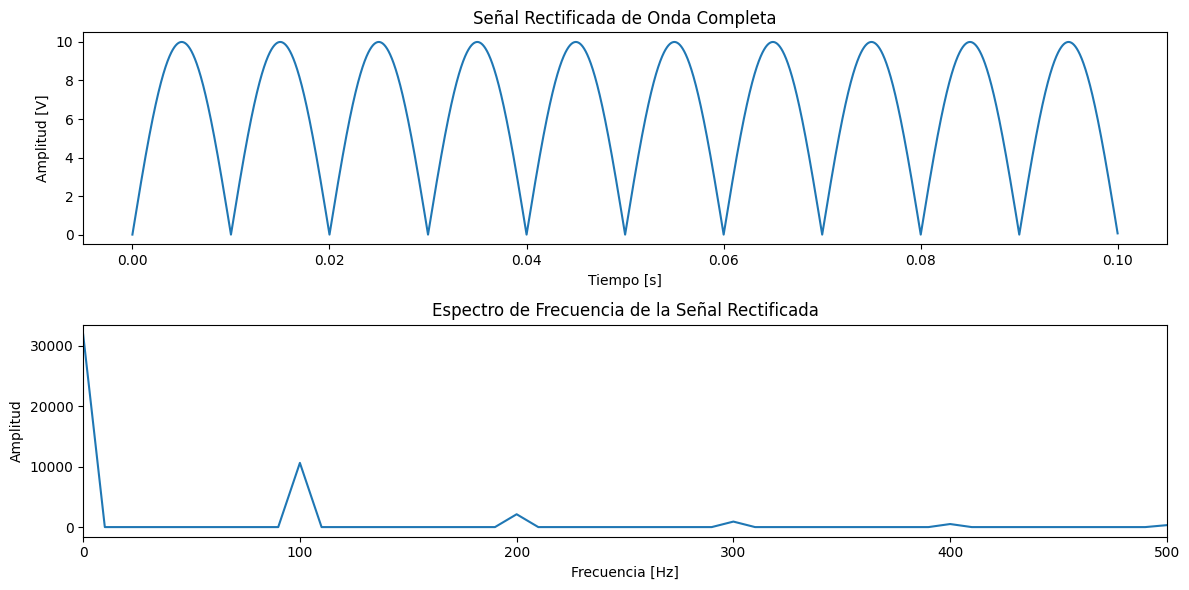

THD de la señal con carga RC: 0.1710


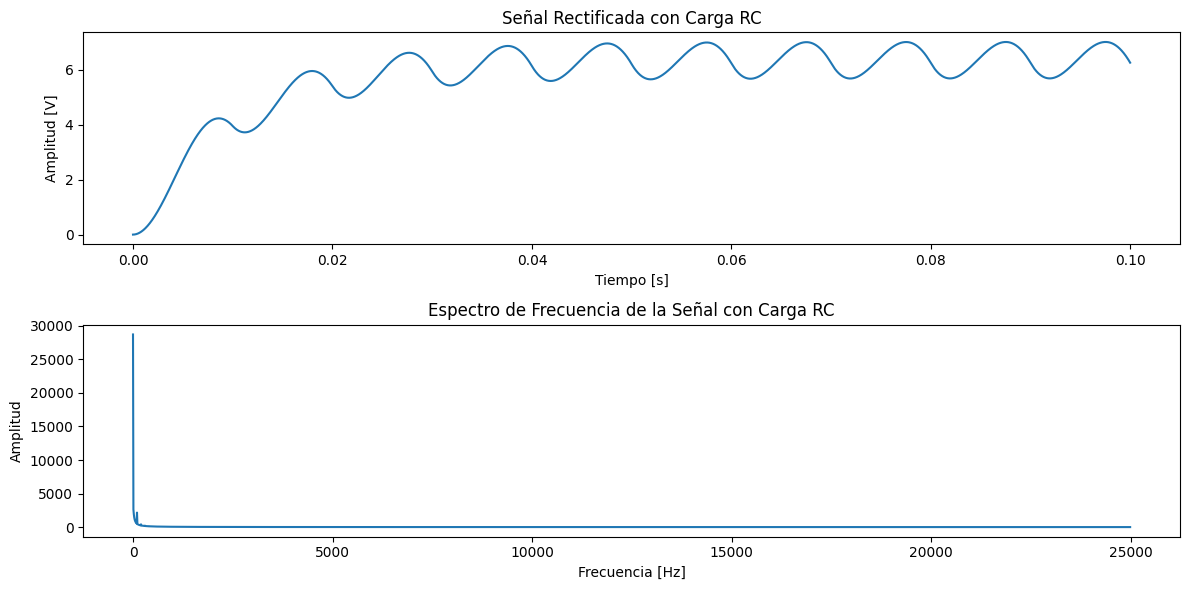

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
frecuencia_fundamental = 50  # Hz
amplitud_fundamental = 10.0   # V
muestras_por_ciclo = 1000
num_ciclos = 5
tiempo = np.linspace(0, num_ciclos / frecuencia_fundamental, num_ciclos * muestras_por_ciclo, endpoint=False)

# Generar señal de entrada sinusoidal
senal_fundamental = amplitud_fundamental * np.sin(2 * np.pi * frecuencia_fundamental * tiempo)

# Rectificador de onda completa
senal_rectificada = np.abs(senal_fundamental)

# Función para calcular THD
def calcular_thd(senal, frecuencia_fundamental, muestras_por_ciclo):
    fft_resultado = np.fft.fft(senal)
    frecuencias = np.fft.fftfreq(len(senal), d=1/(frecuencia_fundamental * muestras_por_ciclo))

    # Encontrar el índice de la frecuencia fundamental
    idx_fundamental = np.argmax(np.abs(fft_resultado[:len(fft_resultado)//2]))

    # Calcular la amplitud de los armónicos
    amplitud_fundamental = np.abs(fft_resultado[idx_fundamental])
    amplitudes_armonicos = np.abs(fft_resultado[:len(fft_resultado)//2])

    # Calcular THD
    thd = np.sqrt(np.sum(amplitudes_armonicos**2) - amplitud_fundamental**2) / amplitud_fundamental
    return thd

# Cálculo del THD para la señal rectificada
thd_rectificada = calcular_thd(senal_rectificada, frecuencia_fundamental, muestras_por_ciclo)
print(f"THD de la señal rectificada: {thd_rectificada:.4f}")

# Visualización de la señal rectificada y su espectro de frecuencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_rectificada)
plt.title('Señal Rectificada de Onda Completa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')

plt.subplot(2, 1, 2)
fft_resultado = np.fft.fft(senal_rectificada)
frecuencias = np.fft.fftfreq(len(senal_rectificada), d=1/(frecuencia_fundamental * muestras_por_ciclo))
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_resultado[:len(fft_resultado)//2]))
plt.title('Espectro de Frecuencia de la Señal Rectificada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim(0,500)

plt.tight_layout()
plt.show()

# Simulación de carga RC
R = 100  # Ohm
C = 100e-6  # F
tau = R * C
senal_rc = np.zeros_like(tiempo)

for i in range(1, len(tiempo)):
    dt = tiempo[i] - tiempo[i-1]
    senal_rc[i] = senal_rc[i-1] + (senal_rectificada[i] - senal_rc[i-1]) * dt / tau

# Cálculo del THD para la carga RC
thd_rc = calcular_thd(senal_rc, frecuencia_fundamental, muestras_por_ciclo)
print(f"THD de la señal con carga RC: {thd_rc:.4f}")

# Visualización de la señal con carga RC y su espectro de frecuencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_rc)
plt.title('Señal Rectificada con Carga RC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')

plt.subplot(2, 1, 2)
fft_resultado_rc = np.fft.fft(senal_rc)
frecuencias_rc = np.fft.fftfreq(len(senal_rc), d=1/(frecuencia_fundamental * muestras_por_ciclo))
plt.plot(frecuencias_rc[:len(frecuencias_rc)//2], np.abs(fft_resultado_rc[:len(fft_resultado_rc)//2]))
plt.title('Espectro de Frecuencia de la Señal con Carga RC')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


# Punto 4


Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Descargando clave_integrante_1 desde https://drive.google.com/uc?id=1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ


Downloading...
From: https://drive.google.com/uc?id=1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ
To: /content/clave_integrante_1.wav
100%|██████████| 5.99M/5.99M [00:00<00:00, 172MB/s]


Descargando palabras_integrante_1 desde https://drive.google.com/uc?id=1T0g9F3m4mYf_k6rvW6IaLdWAqe1u9QX8


Downloading...
From: https://drive.google.com/uc?id=1T0g9F3m4mYf_k6rvW6IaLdWAqe1u9QX8
To: /content/palabras_integrante_1.wav
100%|██████████| 1.53M/1.53M [00:00<00:00, 137MB/s]


Descargando clave_integrante_2 desde https://drive.google.com/uc?id=1ayKeXJ0ccRMYAk28KuVI_i-Qq9fB15vn


Downloading...
From: https://drive.google.com/uc?id=1ayKeXJ0ccRMYAk28KuVI_i-Qq9fB15vn
To: /content/clave_integrante_2.wav
100%|██████████| 2.71M/2.71M [00:00<00:00, 152MB/s]


Descargando palabras_integrante_2 desde https://drive.google.com/uc?id=1PjHBZhdbhamGp6axA9drw1fOVFgDfEgr


Downloading...
From: https://drive.google.com/uc?id=1PjHBZhdbhamGp6axA9drw1fOVFgDfEgr
To: /content/palabras_integrante_2.wav
100%|██████████| 2.84M/2.84M [00:00<00:00, 158MB/s]

/content/audio_file.wav:                      HTML document, Unicode text, UTF-8 text, with very long lines (62307)
/content/clave_integrante_1_converted.wav:    RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/clave_integrante_1.wav:              RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/clave_integrante_2_converted.wav:    RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/clave_integrante_2.wav:              RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/palabras_integrante_1_converted.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/palabras_integrante_1.wav:           RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/palabras_integrante_2_converted.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 48000 Hz
/content/palabras_integrante_2

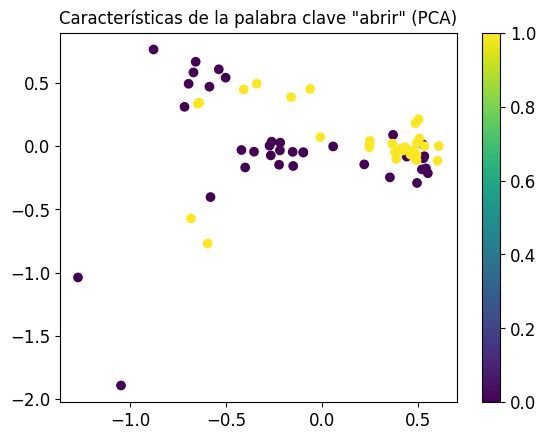

Precisión del modelo: 85.71%


In [63]:
# Instalar dependencias necesarias
!pip install gdown pydub librosa scikit-learn numpy matplotlib

!apt-get install ffmpeg

import gdown
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# Diccionario con los ID de cada archivo (reemplaza ID_REAL_X con los ID correctos)
file_ids = {
    "clave_integrante_1": "1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ",  # base de datos
    "palabras_integrante_1": "1T0g9F3m4mYf_k6rvW6IaLdWAqe1u9QX8",
    "clave_integrante_2": "1ayKeXJ0ccRMYAk28KuVI_i-Qq9fB15vn",
    "palabras_integrante_2": "1PjHBZhdbhamGp6axA9drw1fOVFgDfEgr"
}

# Descargar los archivos
for name, file_id in file_ids.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    output = f"/content/{name}.wav"
    print(f"Descargando {name} desde {url}")
    gdown.download(url, output, quiet=False)

# Verificar el tipo de archivo descargado
!file /content/*.wav

# 2️⃣ Convertir los archivos a WAV si es necesario
def convert_to_wav(file_path):
    audio = AudioSegment.from_file(file_path)
    wav_path = file_path.replace(".wav", "_converted.wav")
    audio.export(wav_path, format="wav")
    return wav_path

# Convertir los audios descargados
for file in file_ids.keys():
    file_path = f"/content/{file}.wav"
    if os.path.exists(file_path):
        convert_to_wav(file_path)

# 3️⃣ Función para extraer segmentos con la palabra clave
def extract_keyword_segments(file_path, keyword="abrir", sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    energy = librosa.feature.rms(y=y)[0]

    # Umbral para detectar partes con la palabra clave
    threshold = np.percentile(energy, 85)  # Ajustamos el umbral para mejorar la detección

    # Detectar inicios y finales de palabras basadas en energía
    speech_segments = np.where(energy > threshold, 1, 0)

    segments = []
    start = None
    for i in range(len(speech_segments)):
        if speech_segments[i] == 1 and start is None:
            start = i
        elif speech_segments[i] == 0 and start is not None:
            end = i
            segments.append((start, end))
            start = None

    # Extraer solo las partes donde posiblemente está la palabra clave
    extracted = []
    for (start, end) in segments:
        segment_audio = y[start * 512:end * 512]  # Ajuste para la ventana de tiempo
        extracted.append(segment_audio)

    return extracted

# Extraer segmentos con la palabra clave
keyword_segments = {}
for file in file_ids.keys():
    file_path = f"/content/{file}_converted.wav"
    if os.path.exists(file_path):
        keyword_segments[file] = extract_keyword_segments(file_path)

# 4️⃣ Aplicar Transformada de Fourier (FFT y RFFT) y extraer MFCC
def apply_fft_and_mfcc(audio_segments, sr=16000):
    fft_results = []
    rfft_results = []
    mfcc_results = []
    for segment in audio_segments:
        # Aplicar FFT
        fft_values = np.abs(np.fft.fft(segment))
        fft_results.append(fft_values[:len(fft_values)//2])  # Tomamos solo la mitad (simetría)

        # Aplicar RFFT
        rfft_values = np.abs(np.fft.rfft(segment))
        rfft_results.append(rfft_values)

        # Extraer MFCC (13 coeficientes)
        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
        mfcc_results.append(np.mean(mfcc, axis=1))  # Tomamos la media de los coeficientes MFCC

    return fft_results, rfft_results, mfcc_results

# Aplicar FFT, RFFT y MFCC a cada segmento con la palabra clave
fft_data = {}
rfft_data = {}
mfcc_data = {}
for file, segments in keyword_segments.items():
    fft_results, rfft_results, mfcc_results = apply_fft_and_mfcc(segments)
    fft_data[file] = fft_results
    rfft_data[file] = rfft_results
    mfcc_data[file] = mfcc_results

# 5️⃣ Extraer características de los segmentos (media, varianza, energía, MFCC)
def extract_features(fft_segment, rfft_segment, mfcc_segment):
    media_fft = np.mean(fft_segment)
    varianza_fft = np.var(fft_segment)
    energia_fft = np.sum(fft_segment ** 2)

    media_rfft = np.mean(rfft_segment)
    varianza_rfft = np.var(rfft_segment)
    energia_rfft = np.sum(rfft_segment ** 2)

    # Características MFCC
    mfcc_features = list(mfcc_segment)

    return [media_fft, varianza_fft, energia_fft, media_rfft, varianza_rfft, energia_rfft] + mfcc_features

# Aplicar la extracción de características a cada segmento
X = []
Y = []
label_map = {
    "clave_integrante_1": 0,  # Persona autorizada
    "clave_integrante_2": 1   # Otras personas
}

for file in fft_data.keys():
    if file in label_map:
        for fft_segment, rfft_segment, mfcc_segment in zip(fft_data[file], rfft_data[file], mfcc_data[file]):
            # Extraemos características de la señal FFT, RFFT y MFCC
            features = extract_features(fft_segment, rfft_segment, mfcc_segment)
            X.append(features)
            Y.append(label_map[file])

X = np.array(X)
Y = np.array(Y)

# 6️⃣ Normalizar y aplicar PCA (solo para visualización)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)  # Usamos PCA solo para visualización
X_pca = pca.fit_transform(X_scaled)

# Graficar
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.colorbar()
plt.title('Características de la palabra clave "abrir" (PCA)')
plt.show()

# 7️⃣ Entrenar un modelo de clasificación (SVM)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# 8️⃣ Función para verificar si la palabra "abrir" es pronunciada por la persona autorizada
def verificar_seguridad(audio_path, model, scaler, label_map, keyword="abrir", sr=16000):
    # Extraer segmentos con la palabra clave
    segments = extract_keyword_segments(audio_path, keyword, sr)

    if not segments:
        print("No se detectó la palabra clave 'abrir'.")
        return False

    # Aplicar FFT, RFFT y MFCC
    fft_results, rfft_results, mfcc_results = apply_fft_and_mfcc(segments, sr)

    # Extraer características
    features = np.array([extract_features(fft_segment, rfft_segment, mfcc_segment) for fft_segment, rfft_segment, mfcc_segment in zip(fft_results, rfft_results, mfcc_results)])

    # Normalizar las características
    features_scaled = scaler.transform(features)

    # Predecir con el modelo
    predictions = model.predict(features_scaled)

    # Verificar si alguna predicción corresponde a la persona autorizada (label 0)
    if 0 in predictions:
        print("Aceptado: La persona autorizada dijo 'abrir'.")
        return True
    else:
        print("Rechazado: La persona no está autorizada o no dijo 'abrir'.")
        return False


In [64]:
# 9️⃣ Subir un archivo de audio desde tu computadora
def subir_audio():
    from google.colab import files
    uploaded = files.upload()
    audio_file = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
    print(f"Archivo subido: {audio_file}")
    return audio_file

# 🔟 Ejemplo de uso
# Subir un archivo de audio desde tu computadora
audio_file = subir_audio()

# Verificar si la persona autorizada dijo "abrir"
verificar_seguridad(audio_file, model, scaler, label_map)

Saving Grabación.m4a to Grabación (3).m4a
Archivo subido: Grabación (3).m4a
Aceptado: La persona autorizada dijo 'abrir'.


True